In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv('data/merged_data.csv')
merged_only_6_17 = pd.read_csv('data/merged_data_only_6_17.csv')
train_call = pd.read_csv('data/train_call.csv')

label_data = merged.iloc[:, :2].set_index("Sample")
y = np.ravel(label_data.values)

X = merged.drop('Subgroup', axis=1).set_index("Sample")
X_only_6_17 = merged_only_6_17.drop('Subgroup', axis=1).set_index("Sample")


In [3]:
# new_indices = []
# for i in train_call.index:
#     if train_call.loc[i, "Chromosome"] == 6 or train_call.loc[i, "Chromosome"] == 17:
#         new_indices.append(i)

# # train_call_only_6_17 = train_call.loc[new_indices]
# # # train_call_only_6_17.reset_index(drop=True, inplace=True)
# # train_call_only_6_17

# merged_only_6_17 = merged.loc[:, [str(i) for i in new_indices]]
# merged_only_6_17 = pd.concat([label_data, merged_only_6_17], axis=1)
# merged_only_6_17.to_csv('data/merged_data_only_6_17.csv', index=False)
# merged_only_6_17



## Baseline model

In [12]:
from sklearn.dummy import DummyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DummyClassifier(strategy="stratified")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

       HER2+       0.30      0.50      0.38         6
         HR+       0.50      0.25      0.33         8
  Triple Neg       0.17      0.17      0.17         6

    accuracy                           0.30        20
   macro avg       0.32      0.31      0.29        20
weighted avg       0.34      0.30      0.30        20



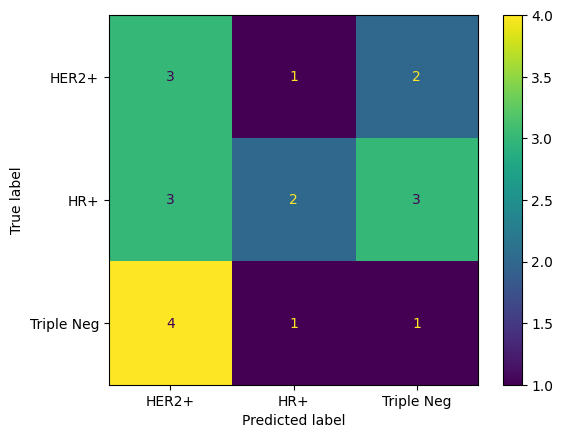

In [13]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## SVM classifier

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

       HER2+       0.86      1.00      0.92         6
         HR+       0.75      0.75      0.75         8
  Triple Neg       0.60      0.50      0.55         6

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.74      0.75      0.74        20



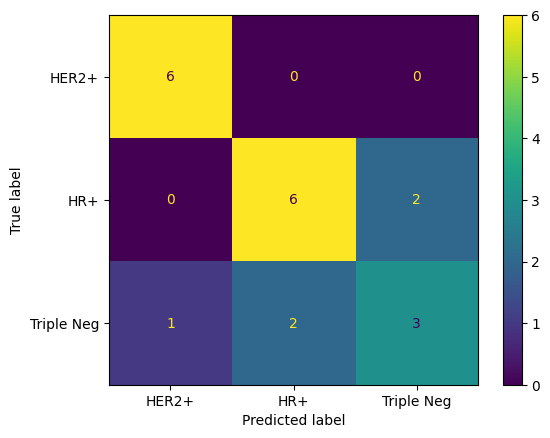

In [5]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf_hyper = GridSearchCV(SVC(), param_grid, verbose=2)
clf_hyper.fit(X_train, y_train)
print(clf_hyper.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

              precision    recall  f1-score   support

       HER2+       1.00      0.67      0.80         6
         HR+       0.60      0.75      0.67         8
  Triple Neg       0.67      0.67      0.67         6

    accuracy                           0.70        20
   macro avg       0.76      0.69      0.71        20
weighted avg       0.74      0.70      0.71        20



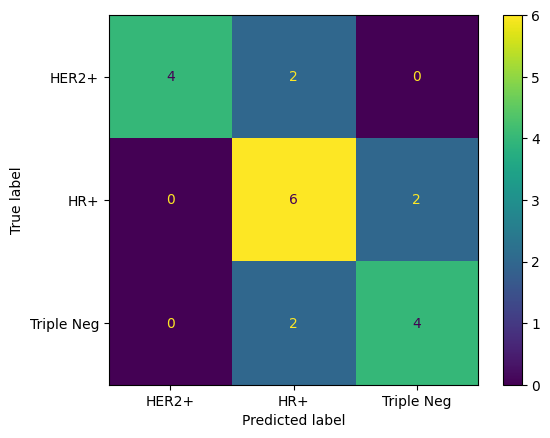

In [7]:
clf = SVC(C= 10, gamma= 'auto', kernel = 'sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Only chromosome 6 and 17

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_only_6_17, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

       HER2+       0.83      0.83      0.83         6
         HR+       0.40      0.25      0.31         8
  Triple Neg       0.33      0.50      0.40         6

    accuracy                           0.50        20
   macro avg       0.52      0.53      0.51        20
weighted avg       0.51      0.50      0.49        20



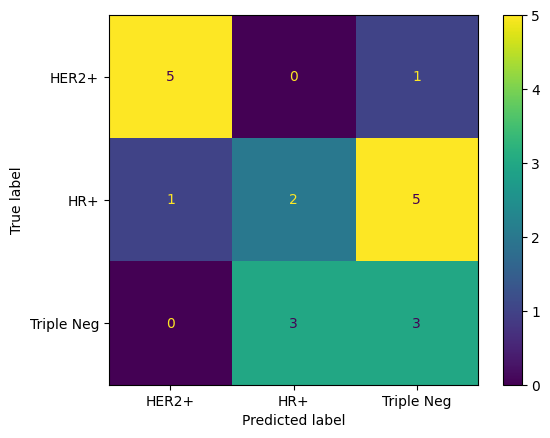

In [9]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_only_6_17, y, test_size=0.2, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf_hyper = GridSearchCV(SVC(), param_grid, verbose=2)
clf_hyper.fit(X_train, y_train)
print(clf_hyper.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

              precision    recall  f1-score   support

       HER2+       1.00      0.50      0.67         6
         HR+       0.45      0.62      0.53         8
  Triple Neg       0.50      0.50      0.50         6

    accuracy                           0.55        20
   macro avg       0.65      0.54      0.56        20
weighted avg       0.63      0.55      0.56        20



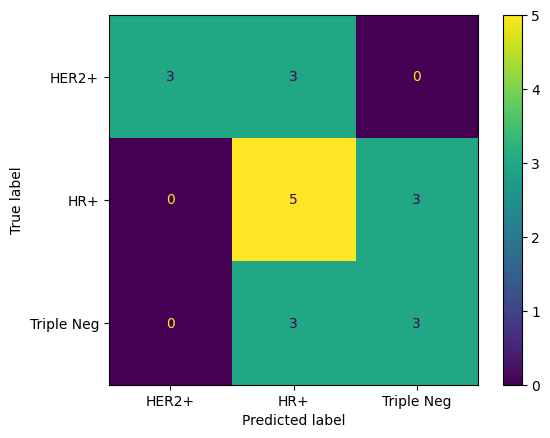

In [11]:
clf = SVC(C = 10, gamma = 0.001, kernel="sigmoid")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()